# Estimating Healthcare Insurance Expenses through Machine Learning.


In the ever-evolving landscape of healthcare, where costs have soared due to the complexities of the modern healthcare system, the power of data has emerged as a beacon of hope. Healthcare analytics, much like a skilled navigator, holds the key to understanding and transforming the intricate web of health insurance costs. This is the mission of our project: to harness the transformative potential of data.

Our journey begins with the realization that health insurance costs have reached unprecedented levels. This escalation is a result of numerous factors, including the rising cost of healthcare services and an array of individual characteristics. It's a multifaceted puzzle that calls for a comprehensive solution.

We embark on this mission with the heart of a data virtuoso. Armed with the latest tools and techniques in healthcare analytics, we delve into a vast dataset, comprising variables such as age, sex, BMI, number of children, smoking habits, and region. Like a sculptor chiseling away at a block of marble, we meticulously dissect and interpret this data, applying both quantitative and qualitative methods to reveal the hidden insights and patterns within.

At the core of our analysis lies the prediction of medical costs – a crucial indicator that unlocks a world of possibilities. This prediction empowers individuals, healthcare providers, and insurers to make informed decisions. It guides patients toward better planning, assists healthcare professionals in optimizing treatment plans, and helps insurance providers in setting fair premiums.

Collaboration is at the heart of our endeavor. We work closely with experts in the field, building a bridge between the world of data and the world of healthcare. The insights we generate through data analysis become the guiding stars, steering our stakeholders towards better decision-making. With compelling data visualizations, we breathe life into these insights, making them accessible and actionable.

Our work, much like that of the unsung hero in the healthcare analytics narrative, may often go unnoticed. Yet, its impact is profound. It contributes to the ongoing saga of healthcare excellence, making the journey towards affordable and efficient healthcare that much more extraordinary.

In the realm of health insurance cost prediction, we are the unsung heroes, unlocking the extraordinary stories of financial well-being, efficient healthcare planning, and a more accessible healthcare system. Our dedication to data and our ability to transform it into actionable insights shape the path to a healthier, more financially secure future for all.

# Module 1

# Task 1: Analyzing Insurance Costs.¶


In the quest to make healthcare accessible and affordable, we embark on the task of analyzing insurance costs using the data at our disposal. This endeavor is driven by a profound need to understand the factors that influence healthcare expenses, enabling us to provide individuals and healthcare stakeholders with the insights they need to make informed decisions. Our data, extracted from the "insurance.csv" file, holds the key to unraveling the mysteries of cost determinants such as age, gender, BMI, family size, smoking habits, and geographical location. As we load this dataset into our analysis, we prepare to unlock a world of possibilities. By exploring these data patterns and relationships, we strive to empower individuals with the knowledge required to plan for their financial health. Ultimately, our mission is to pave the way for more efficient healthcare planning, fairer insurance premiums, and a future where healthcare is within reach for everyone.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./insurance.csv')

print(f"Original shape: {df.shape}") 


Original shape: (1338, 7)


In [35]:
# Explore the first few rows of the dataset
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [36]:
# Summary statistics of the numerical columns
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [37]:
# Assess the extent of missing values in the dataset
missing_data = df.isnull().sum()

# Display the number of missing values for each column
print("Missing values in the dataset:")
print(missing_data)

Missing values in the dataset:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [38]:
# Check number of duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")

df = df.drop_duplicates()

print(f"New shape: {df.shape}")

Number of duplicates: 1
New shape: (1337, 7)


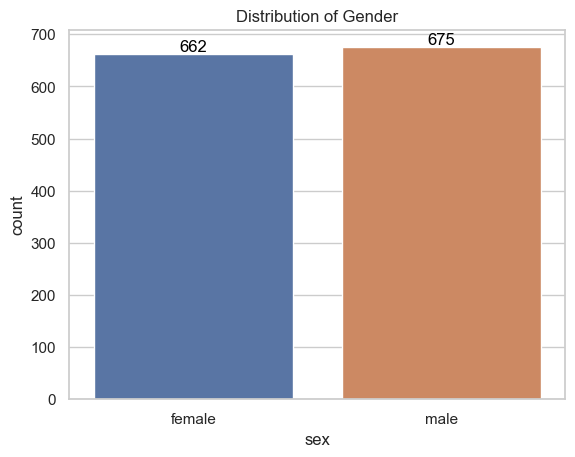

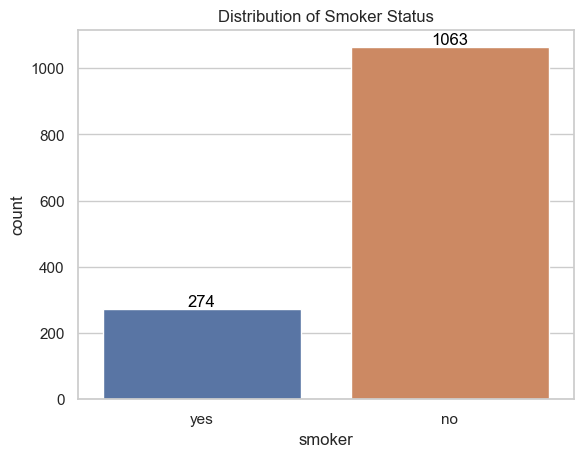

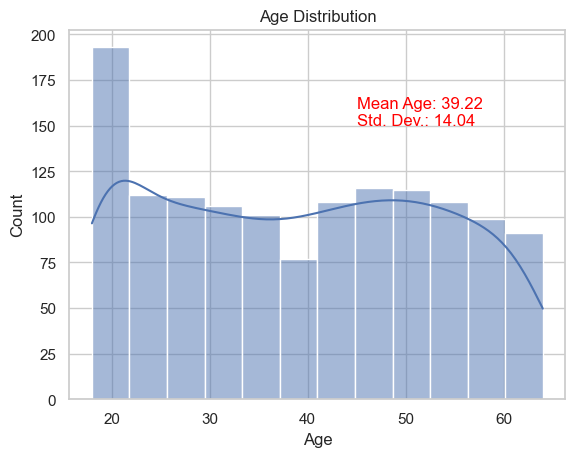

In [39]:
# Data distribution by gender
sns.countplot(x="sex", data=df)
plt.title("Distribution of Gender")

# Add counts on top of each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

# Data distribution by smoker status
sns.countplot(x="smoker", data=df)
plt.title("Distribution of Smoker Status")

# Add counts on top of each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

#Data 
sns.histplot(df["age"], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

# Add mean and standard deviation to the plot
mean_age = df["age"].mean()
std_age = df["age"].std()
plt.text(45, 150, f"Mean Age: {mean_age:.2f}\nStd. Dev.: {std_age:.2f}", fontsize=12, color='red')

plt.show()


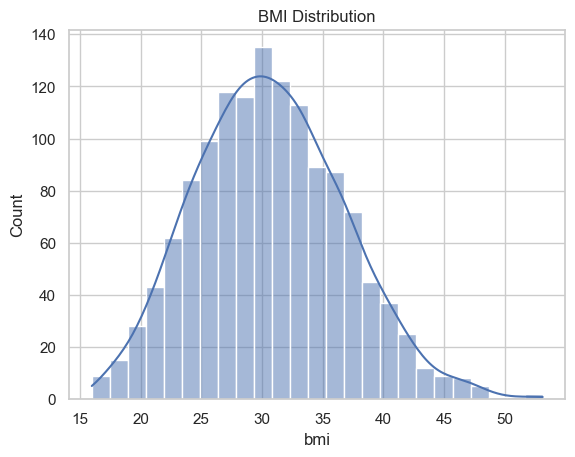

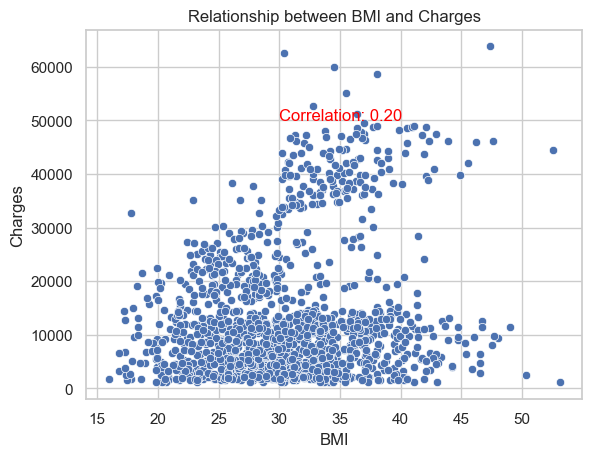

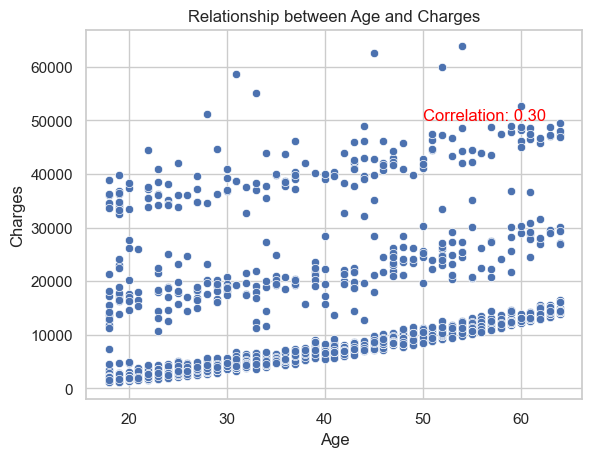

In [40]:
# BMI distribution
sns.histplot(df["bmi"], kde=True)
plt.title("BMI Distribution")
plt.show()

# Relationship between BMI and charges
sns.scatterplot(x="bmi", y="charges", data=df)
plt.title("Relationship between BMI and Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")

# Add correlation coefficient to the plot
correlation = df["bmi"].corr(df["charges"])
plt.text(30, 50000, f"Correlation: {correlation:.2f}", fontsize=12, color='red')

plt.show()

# Relationship between age and charges
sns.scatterplot(x="age", y="charges", data=df)
plt.title("Relationship between Age and Charges")
plt.xlabel("Age")
plt.ylabel("Charges")

# Add correlation coefficient to the plot
correlation = df["age"].corr(df["charges"])
plt.text(50, 50000, f"Correlation: {correlation:.2f}", fontsize=12, color='red')

plt.show()

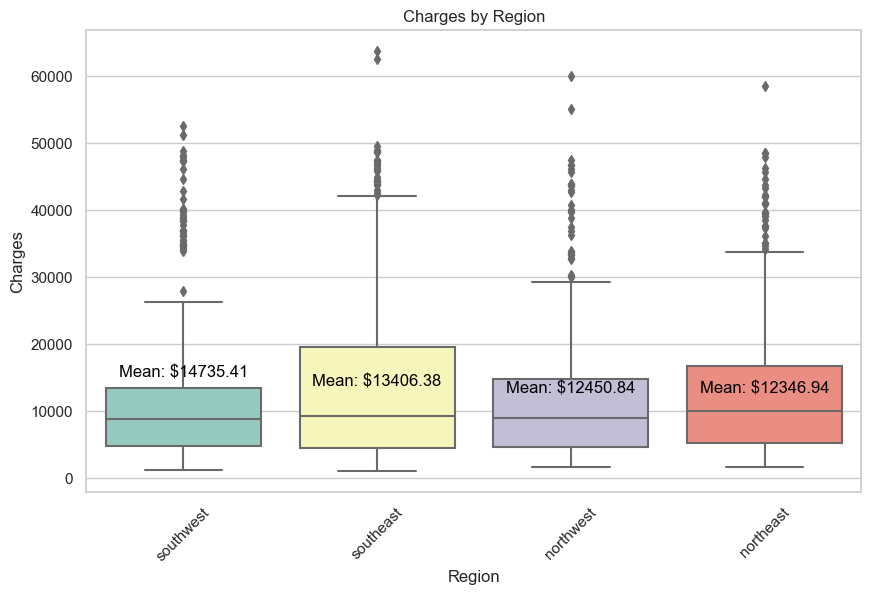

In [41]:
# Set the style for the Seaborn plots
sns.set(style="whitegrid")

# Create a boxplot of charges by region
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x="region", y="charges", data=df, palette="Set3")  # Use Set3 color palette

# Add labels and a title
plt.xlabel("Region")
plt.ylabel("Charges")
plt.title("Charges by Region")

# Add numerical values (mean) above each box
grouped_data = df.groupby("region")["charges"].mean().sort_values(ascending=False)
for i, value in enumerate(grouped_data):
    plt.text(i, value + 1000, f'Mean: ${value:.2f}', ha='center', va='center', fontsize=12, color='black')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


In [42]:
# Compare smokers vs non-smokers charges
smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker'] == 'no']

mean_charges_smokers = smokers['charges'].mean()
mean_charges_non_smokers = non_smokers['charges'].mean()

print(f"Mean charges for Smokers = {mean_charges_smokers}")
print(f"Mean charges for Non-Smokers = {mean_charges_non_smokers}")

# Compare mean charges by sex
mean_charges_by_sex = df.groupby('sex')['charges'].mean()

for sex, mean_charges in mean_charges_by_sex.items():
    print(f"Mean charges for {sex} is {mean_charges}")

Mean charges for Smokers = 32050.23183153285
Mean charges for Non-Smokers = 8440.660306508935
Mean charges for female is 12569.578843835347
Mean charges for male is 13974.998863762961


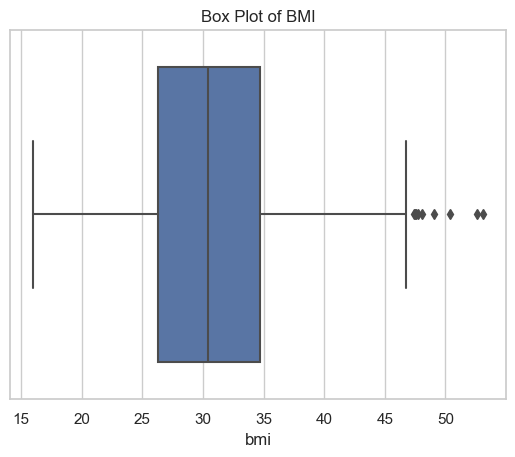

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize outliers for a specific feature (e.g., 'bmi')
sns.boxplot(x=df['bmi'])
plt.title("Box Plot of BMI")
plt.show()


In [44]:
# Calculate the correlation between numerical variables
correlation = df.corr()
print(correlation)


               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000


# Module 2

# Task 1: Empowering Analysis with Encoded Insights.

Our journey to decipher the intricacies of healthcare insurance costs continues with a pivotal task: encoding categorical features. By employing the LabelEncoder from the sklearn library, we convert non-numeric attributes such as 'sex' and 'smoker' into numerical values. This transformation is essential as it enables us to feed these features into our analytical models, providing a more comprehensive understanding of the factors influencing insurance costs. This coding task bridges the gap between data and actionable insights, setting the stage for robust analysis. With each attribute transformed, we move closer to uncovering the hidden relationships within our data and facilitating more precise predictions. Our commitment to encoding is a testament to our dedication to providing individuals and healthcare stakeholders with the tools they need to make informed decisions about their financial health and healthcare planning.

In [45]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'sex' column
df['sex'] = label_encoder.fit_transform(df['sex'])

# Encode the 'smoker' column
df['smoker'] = label_encoder.fit_transform(df['smoker'])


# Task 2: Unleashing the Power of One-Hot Encoding.

As we delve deeper into our quest to unravel the mysteries of healthcare insurance costs, we face a new challenge: encoding the 'region' attribute using one-hot encoding. This task is essential to translate geographical regions into numerical representations, allowing us to incorporate this valuable information into our analysis. By executing the code provided, we create a series of binary columns, each representing a different region. These columns serve as vital indicators, enabling us to discern the impact of location on insurance costs. Every region reveals unique insights, and this one-hot encoding process equips us with the means to uncover these intricate patterns. Our commitment to one-hot encoding is yet another testament to our dedication to providing individuals and healthcare stakeholders with a more comprehensive view of the factors influencing healthcare costs, empowering them to make informed decisions.

In [46]:
one_hot_encode = pd.get_dummies(df['region'])


# Task 3: Incorporating Regional Factors.


In our relentless pursuit of comprehensive healthcare analysis, we have reached a critical juncture – the integration of regional data into our dataset. By concatenating the one-hot encoded 'region' columns, we expand our dataset's horizons. This task is crucial as it allows us to incorporate the influence of geographical regions on insurance costs into our analysis. With this enhancement, we are better equipped to unearth region-specific trends, offering a more detailed and nuanced perspective on cost determinants. Our commitment to this integration extends our mission to empower individuals and healthcare stakeholders with the tools they need to navigate the complexities of healthcare planning and financial decision-making. With each column added, we take a significant stride toward achieving our vision of a healthcare landscape where insights are both comprehensive and actionable.



In [47]:
df1 = pd.concat([df, one_hot_encode], axis=1)


# Task 4: Removing Redundancy.


In our ongoing journey to unlock the secrets of healthcare insurance costs, we reach a crucial juncture – the removal of the 'region' column from our dataset. This task is vital as it streamlines our data, eliminating redundancy while preserving the valuable regional insights we've gained through one-hot encoding. By executing this step, we enhance the efficiency of our analysis, making it easier to identify the true determinants of insurance costs. Our commitment to this data refinement aligns with our mission to provide individuals and healthcare stakeholders with precise and actionable insights for healthcare planning and financial decision-making. With each column removed, we advance further toward our vision of a healthcare landscape where data is clear, comprehensive, and focused on improving the health and financial well-being of all.



In [48]:
df1.drop('region', axis=1, inplace=True)


# Module 3

# Task 1: Setting the Stage for Precise Predictions.

In our journey to gain a deep understanding of healthcare insurance costs, we have reached a pivotal moment – the division of our dataset into training and test sets. This task is essential as it prepares us for accurate predictions by creating distinct subsets for model training and evaluation. By executing the code provided, we allocate 80% of the data to the training set and 20% to the test set, ensuring a robust and reliable analysis. Our commitment to this data split reflects our dedication to providing individuals and healthcare stakeholders with precise predictions for healthcare planning and financial decision-making. With each split, we move closer to achieving our vision of a healthcare landscape where insights are not just comprehensive but also highly accurate, ultimately promoting financial and health well-being for all.



In [49]:
from sklearn.model_selection import train_test_split
X = df1.drop("charges", axis=1)
y = df1["charges"]

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 2: Evaluating Model Performance.

In [50]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Create an instance of the RandomForestRegressor
rand_forest_model = RandomForestRegressor(n_estimators=50, n_jobs=2, random_state=42)

In [51]:
# Use cross_val_score to evaluate the model's performance
# 'scoring' is set to "neg_mean_squared_error" to calculate the negative mean squared error
# 'cv' is set to 10 for 10-fold cross-validation
scores = cross_val_score(rand_forest_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

# Calculate RMSE values from the negative mean squared error scores
performance = np.sqrt(-scores)

# Calculate the standard deviation of RMSE values
std = performance.std()

In [52]:
# Display the RMSE values and standard deviation
print("RMSE values:", performance)
print("Standard Deviation of RMSE:", std)

RMSE values: [5236.8564584  5590.19844975 4276.32833592 5391.43005712 5461.77086147
 3879.35166638 5319.27260635 4193.85063882 5378.22765284 4879.82378301]
Standard Deviation of RMSE: 586.8826484248


# Task 3: Forecasting Healthcare Costs.

In our pursuit of accurate healthcare insurance cost predictions, we've reached the culmination of our journey. With a Random Forest Regression model in place, we've trained it on the training dataset, equipping it with the knowledge to predict healthcare charges. By executing this model, we make predictions using the test dataset, offering us a glimpse of how well our predictions align with actual healthcare costs. The rounded predictions are presented to ensure clarity, and they provide a direct comparison with the real costs. This final step brings us closer to our mission of providing individuals and healthcare stakeholders with precise and actionable insights for informed healthcare planning and financial decision-making. With these comparisons in hand, we enter a new era where predictions meet reality, offering a path to more accurate healthcare cost planning and ultimately promoting better financial and health well-being for all.



In [53]:
import numpy as np
import pandas as pd

# Train the Random Forest Regression model on the training dataset
rand_forest_model.fit(X_train, y_train)

# Make predictions using the test dataset
predictions = rand_forest_model.predict(X_test)

# Round the predictions to two decimal places
rounded_predictions = np.round(predictions, 2)

# Create a DataFrame to compare actual charges and predicted charges
compare = pd.DataFrame({'Actual Charges': y_test.values.round(2), 'Predicted Charges': rounded_predictions})

# Display the first 10 entries of the comparison
print(compare.head(10))

   Actual Charges  Predicted Charges
0         8688.86           10334.48
1         5708.87            6651.49
2        11436.74           12295.40
3        38746.36           42608.01
4         4463.21            6853.03
5         9304.70            9366.65
6        38511.63           39526.20
7         2150.47            2194.72
8         7345.73            8516.75
9        10264.44           10708.99


In [54]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)


Mean Absolute Error (MAE): Calculate the mean absolute difference between predicted values and actual values. Lower MAE indicates better model performance.

Mean Squared Error (MSE): Calculate the mean squared difference between predicted values and actual values. Lower MSE indicates better model performance.

Root Mean Squared Error (RMSE): Calculate the square root of the MSE. RMSE is in the same unit as the target variable, and a lower RMSE is better.

R-squared (R^2) Score: Calculate the proportion of the variance in the dependent variable that is predictable from the independent variables. R-squared values range from 0 to 1, with higher values indicating a better fit. It measures the goodness of fit.

In [55]:
print("Mean Absolute Error (MAE):", mae) 
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)


Mean Absolute Error (MAE): 2572.813654523134
Mean Squared Error (MSE): 21602328.281198952
Root Mean Squared Error (RMSE): 4647.830491874564
R-squared (R^2) Score: 0.8824401883337721


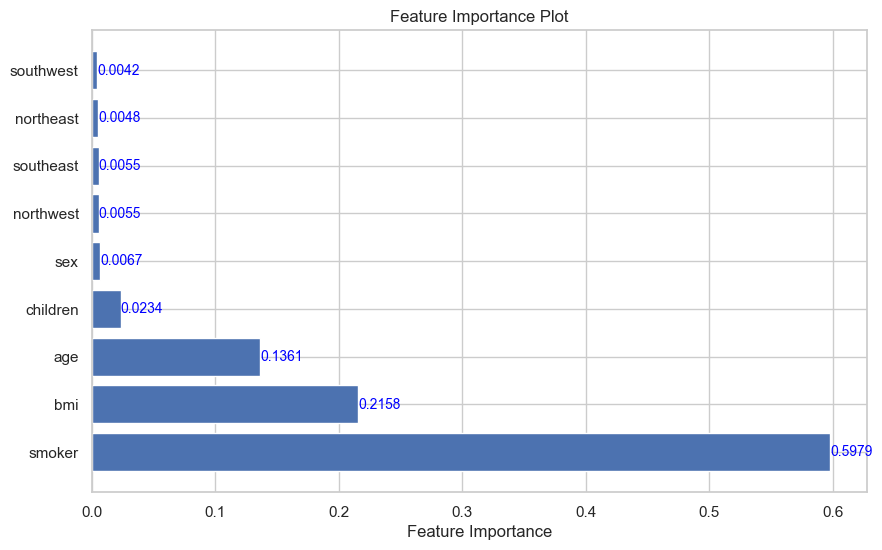

In [56]:
import matplotlib.pyplot as plt

# Get feature importance values and feature names
feature_importance = rand_forest_model.feature_importances_
feature_names = X_train.columns

# Sort features by importance in descending order
sorted_idx = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel("Feature Importance")
plt.title("Feature Importance Plot")

# Annotate the importance values on the plot
for i, v in enumerate(sorted_feature_importance):
    plt.text(v, i, f"{v:.4f}", color='blue', va='center', fontsize=10)

plt.show()


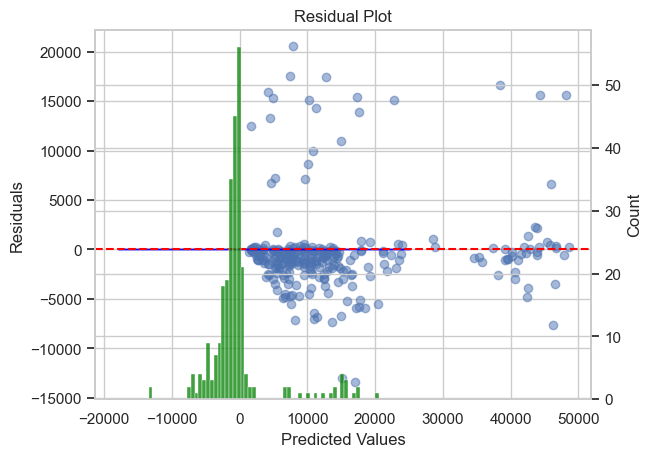

In [57]:
residuals = y_test - predictions

# Create a scatter plot of predicted values vs. residuals
plt.scatter(predictions, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")

# Add a kernel density plot of residuals
sns.kdeplot(residuals, shade=True, color="blue", ax=plt.gca())

# Add a histogram of residuals on the right side of the plot
plt.twinx()
sns.histplot(residuals, kde=False, color="green", ax=plt.gca())

plt.show()
